In [1]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import networkx as nx

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.test.mock import FakeManhattan

In [2]:
def create_qaoa_circuit() -> QuantumCircuit:
    """ taken from IBMQ Experience """
    qreg_q = QuantumRegister(3, 'q')
    circuit = QuantumCircuit(qreg_q)

    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rz(-0.06942544294642758, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rz(-0.20827632883928274, qreg_q[0])
    circuit.rx(0.7530122052855767, qreg_q[0])
    circuit.h(qreg_q[2])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.rz(1.2496579730356965, qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.rz(-0.20827632883928274, qreg_q[1])
    circuit.rx(0.7530122052855767, qreg_q[1])
    circuit.rx(0.7530122052855767, qreg_q[2])
    
    return circuit

In [3]:
# transpile circuit for ibmq_manhattan
device = FakeManhattan() 
conf = device.configuration()
print(conf.basis_gates)
G = nx.Graph()
G.add_nodes_from(range(0,conf.n_qubits))
G.add_edges_from(conf.coupling_map)
pos = nx.kamada_kawai_layout(G)

['id', 'rz', 'sx', 'x', 'cx', 'reset']


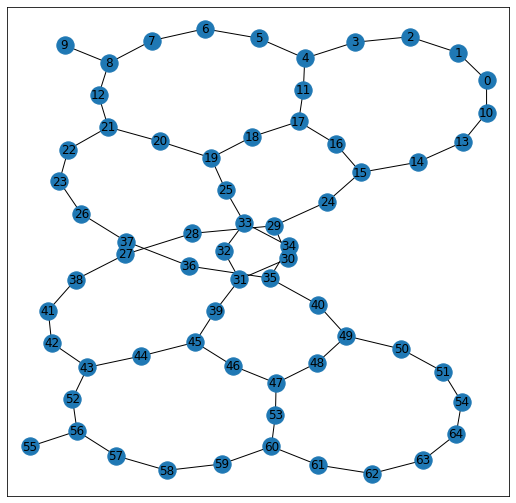

In [4]:
nx.draw_networkx(G, pos, with_labels = True)
size = (9, 9)
plt.gcf().set_size_inches(size)
plt.show() 

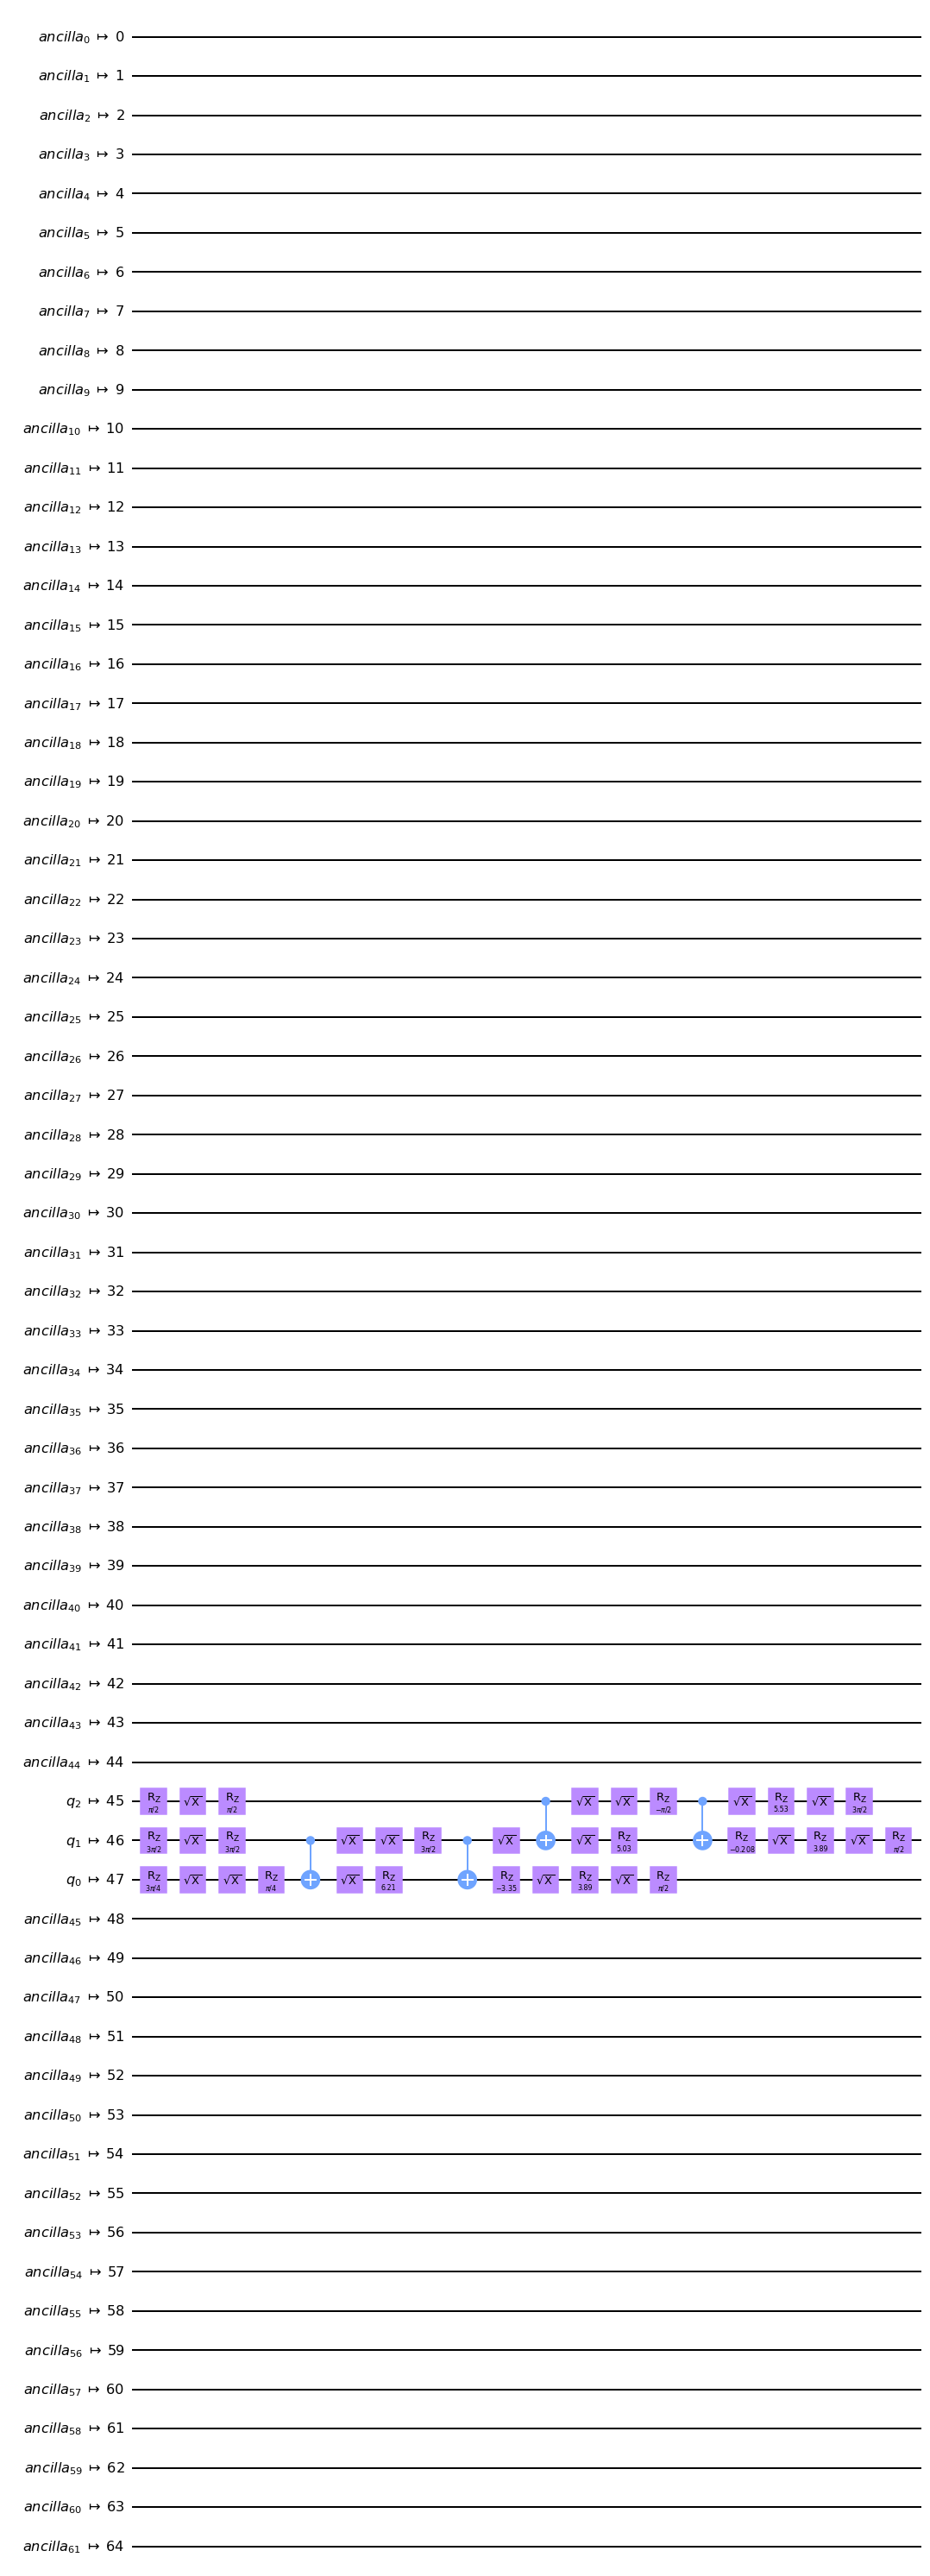

In [5]:
qc = create_qaoa_circuit()
circuit_transpiled = transpile(qc, backend=device, optimization_level=3)
circuit_transpiled.draw(output='mpl')